In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import datasets

## 大綱  
   * [Load Data](#Load-Data)
   * [平均值、4分位數](#平均值、4分位數)
   * [圖表](#圖表)
   * [PCA](#PCA)
   * [K-means](#K-means)

<h2 id = "40">Load Data</h2>
  用sklearn.datasets內建的Iris dataset

In [33]:
iris = datasets.load_iris()
print(iris.keys())
iris

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
Data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
Data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
labels = pd.DataFrame(iris['target'], columns = ['target_names'])
labels

,target_names
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [34]:
Iris = pd.concat([Data, labels], axis = 1)
Iris

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target_names, Length: 150, dtype: int32

## 平均值、4分位數

In [7]:
Iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
q1 = Iris.quantile(.25)
q3 = Iris.quantile(.75)
IQR = q3 - q1
outliers = Iris[((Iris < (q1 - 1.5*IQR)) | (Iris > (q3 + 1.5*IQR)))]
outliers.count()

sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
target_names         0
dtype: int64

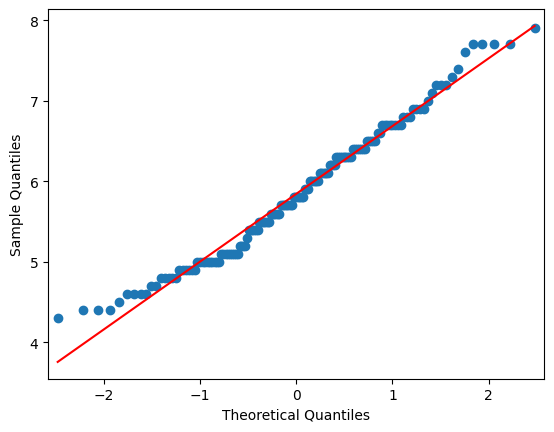

In [11]:
fig = sm.qqplot(Iris['sepal length (cm)'], line='r')
plt.show()


## 圖表

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

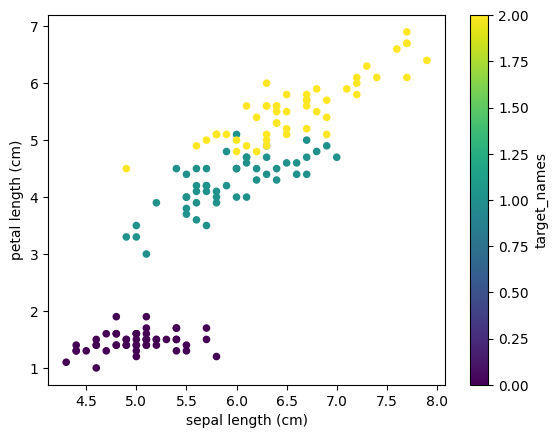

In [9]:
#DataFrame內建的函式
Iris.plot.scatter(x = 0,
                  y = 2,
                  c = 4,
                  colormap='viridis')

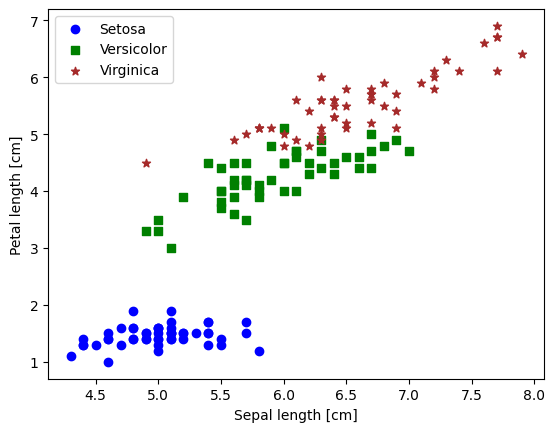

In [10]:
# extract sepal length and petal length
X = Iris.iloc[:, [0, 2]].values
 
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='s', label='Versicolor')
plt.scatter(X[100:, 0], X[100:, 1],
            color='brown', marker='*', label='Virginica')
 
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

## PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Iris.iloc[:, 0:3])
New_Iris = pca.transform(Iris.iloc[:, 0:3])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)
New_Iris

[0.92464061 0.06046599]
[23.4515852   5.99710044]


array([[-2.49088018,  0.32097336],
       [-2.52334286, -0.17840062],
       [-2.71114888, -0.13782006],
       [-2.55775595, -0.31567523],
       [-2.53896432,  0.3313569 ],
       [-2.13542015,  0.75052335],
       [-2.67669609, -0.07294414],
       [-2.42912498,  0.16293168],
       [-2.70915877, -0.57231813],
       [-2.44080592, -0.12390824],
       [-2.30049402,  0.64153859],
       [-2.41545393,  0.01527354],
       [-2.5623262 , -0.24232295],
       [-3.03215612, -0.50249413],
       [-2.44677625,  1.17958596],
       [-2.2472496 ,  1.35344664],
       [-2.50197109,  0.8297773 ],
       [-2.49088018,  0.32097336],
       [-2.00936932,  0.86798447],
       [-2.42654485,  0.52407748],
       [-2.08991614,  0.37899402],
       [-2.41744404,  0.44977161],
       [-3.06144863,  0.15492154],
       [-2.19776537,  0.11292117],
       [-2.14054073, -0.04416692],
       [-2.30108404, -0.15410527],
       [-2.33748725,  0.1431182 ],
       [-2.3602591 ,  0.3650822 ],
       [-2.44279603,

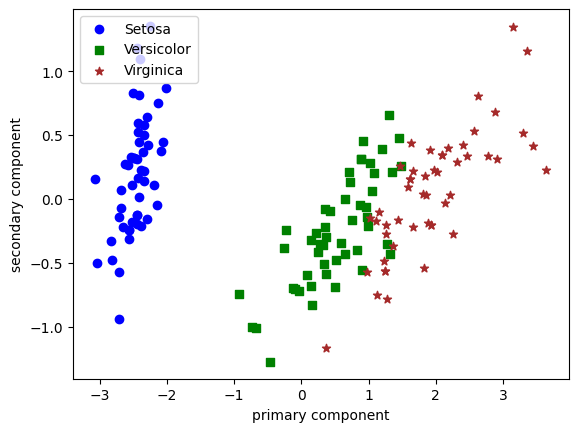

In [32]:
New_Iris = pd.DataFrame(New_Iris, columns = ['primary component', 'secondary component'])
new_Iris = pd.concat([New_Iris, Iris['target_names']], axis = 1)

X = new_Iris.values
 
plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='s', label='Versicolor')
plt.scatter(X[100:, 0], X[100:, 1],
            color='brown', marker='*', label='Virginica')
 
plt.xlabel('primary component')
plt.ylabel('secondary component')
plt.legend(loc='upper left')

plt.show()

## K-means

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

Kmeans = KMeans(n_clusters = 3, n_init = 10).fit(Iris.iloc[:, [0,1,2,3]])

print(classification_report(Iris['target_names'].values, Kmeans.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150

